In [1]:
# importing useful stuffzzz
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# importing data
data = pd.read_csv("Final5",index_col=0, header=0)
data.head()


,X1,X12_ABS,X13_ABS,X14_ABS,X15_ABS,X16_ABS,X17_ABS,X2,X3,X4,...,X15_M,X16_M,X17_M,X18_BI,X19_BI,X20_BI,X21_BI,X22_BI,X23_BI,Y
0,-1.869598,-0.758386,-0.785153,-1.088616,-1.579920,-1.541281,-1.483532,2,2,1,...,3,2,1,0,1,0,0,0,0,1
1,0.034263,-0.866772,-0.935035,-0.794573,-0.699341,-0.636680,-0.606347,2,2,2,...,3,2,1,0,1,1,1,0,1,1
2,-0.271418,0.116536,-0.233725,-0.216424,-0.139167,-0.067265,-0.007117,2,2,2,...,3,2,1,1,1,1,1,1,1,0
3,-0.895980,0.423406,0.476861,0.528327,0.227939,0.296254,0.345181,2,2,1,...,3,2,1,1,1,1,1,1,1,0
4,-0.895980,-0.482617,-0.597292,0.313576,0.054974,0.059507,0.098518,1,2,1,...,3,2,1,1,1,1,1,1,1,0


In [2]:
# Separating the variables using the iloc function
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [3]:
# Converting the data set into a matrix
data_matrix = xgb.DMatrix(data=X,label=y)


In [4]:
# Splitting the data using the same parameters used in the LogisticRegression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [6]:
#Starting the XGBoost
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

## Fitting the xg_reg variable
xg_reg.fit(X_train, y_train)

### Creating the predictions variable
predictors = xg_reg.predict(X_test)

In [7]:
# Creating the rmse model/variable
rmse = np.sqrt(mean_squared_error(y_test,predictors))
print("RMSE : %f" % (rmse))

RMSE : 0.362729


In [8]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[22:01:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_

In [9]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.480759,0.000257,0.480857,0.000169
1,0.464091,0.000571,0.464283,0.000323
2,0.449000,0.000621,0.449406,0.001042
3,0.437081,0.000312,0.437590,0.002072
4,0.426843,0.000628,0.427518,0.002113


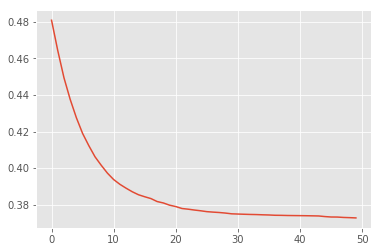

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results['test-rmse-mean'].plot()

In [11]:
print((cv_results["test-rmse-mean"]).tail(1))


49    0.372744
Name: test-rmse-mean, dtype: float64


[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[22:02:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_

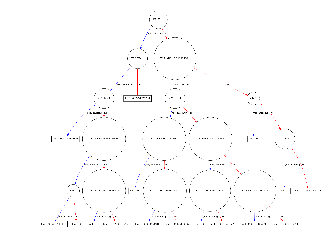

In [12]:
xg_reg = xgb.train(params=params, dtrain=data_matrix, num_boost_round=10)

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 30]
plt.show()

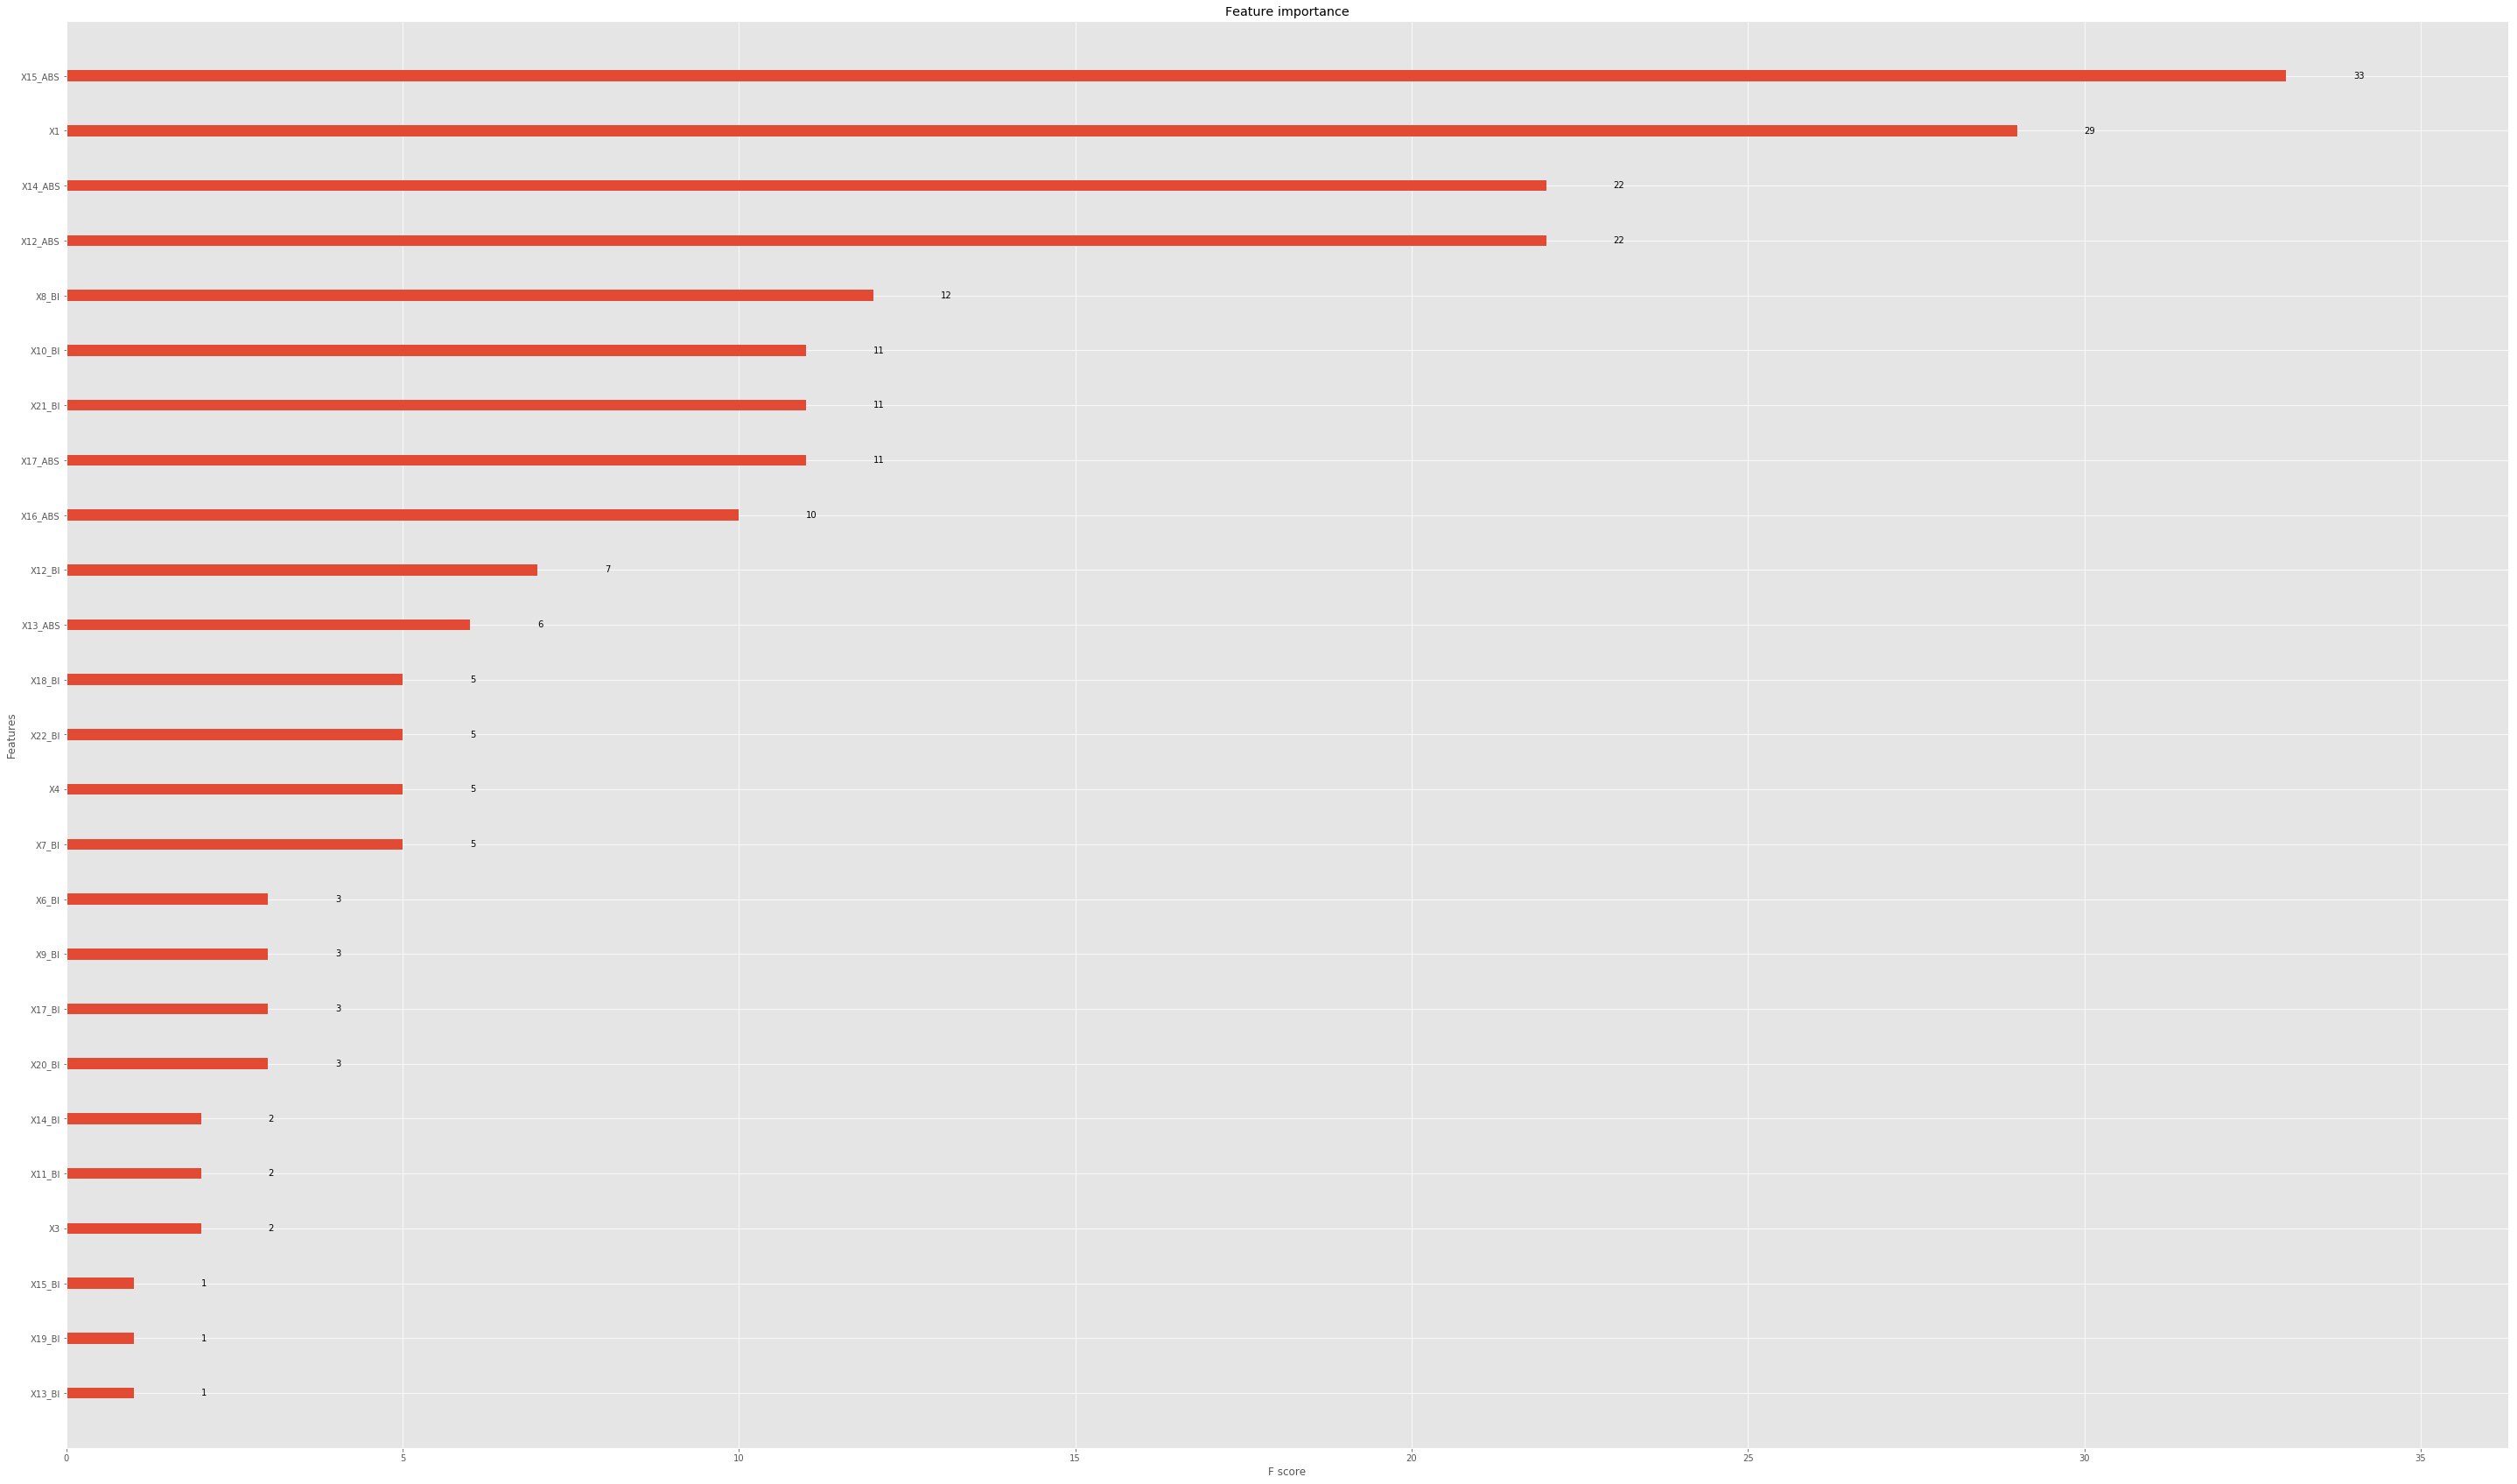

In [13]:
xgb.plot_importance(xg_reg)
#plt.rcParams['figure.figsize'] = [5, 5]
plt.show()